# Bike Sharing Case Study

## Step 1: Reading and Understanding the Data

In [85]:
#importing essential Libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [86]:
#Read the Data

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [87]:
#Explore the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [88]:
# instant is irrelevent column
# dteday is irrelevent becasue other weekday, month, year is already given
#bike["casual"]+bike["registered"]

bike.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)


In [89]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [90]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Visualising Categorical Variables


In [91]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Checking Outliers and Treatment

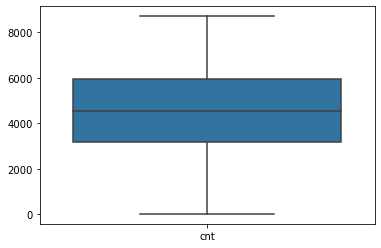

In [92]:
sns.boxplot(data= bike[['cnt']])
plt.show()


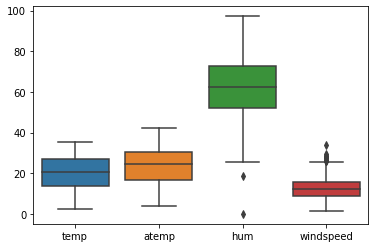

In [93]:
sns.boxplot(data= bike[['temp', 'atemp', 'hum', 'windspeed']])
plt.show()


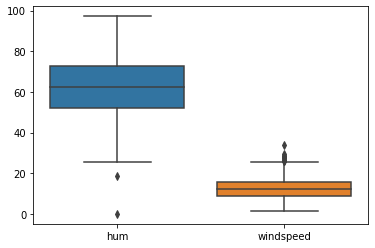

In [94]:
sns.boxplot(data= bike[['hum', 'windspeed']])
plt.show()


In [95]:
bike[['hum', 'windspeed']].describe()

,hum,windspeed
count,730.000000,730.000000
mean,62.765175,12.763620
std,14.237589,5.195841
min,0.000000,1.500244
25%,52.000000,9.041650
50%,62.625000,12.125325
75%,72.989575,15.625589
max,97.250000,34.000021


In [96]:
#iqr(hum) = Q3-Q1
Q3_hum = 72.989575
Q1_hum = 52
IQR_hum = Q3_hum - Q1_hum
min_hum = Q1_hum - 1.5*IQR_hum
print("IQR_hum : ",IQR_hum)
print("min_hum : ",min_hum,"\n")


#iqr(windspeed) = Q3-Q1
Q3_wind = 15.625589
Q1_wind = 9.041650
IQR_wind = Q3_wind - Q1_wind
max_hum = Q3_wind + 1.5*IQR_wind

print("IQR_wind : ",IQR_wind)
print("max_hum : ",max_hum)

IQR_hum :  20.989575000000002
min_hum :  20.515637499999997 

IQR_wind :  6.583938999999999
max_hum :  25.5014975


In [97]:
bike["hum"] = bike["hum"].apply(lambda x : min_hum if x < min_hum else x) 
bike["windspeed"] = bike["windspeed"].apply(lambda x : max_hum if x > max_hum else x)

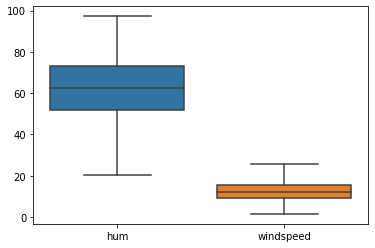

In [98]:
sns.boxplot(data= bike[['hum', 'windspeed']])
plt.show()


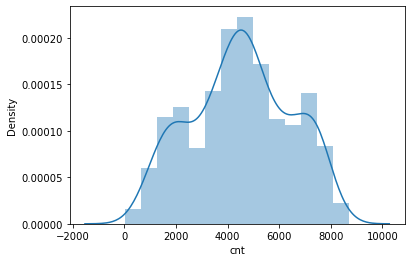

In [99]:
# CNT
sns.distplot(bike["cnt"])
plt.show()

In [100]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

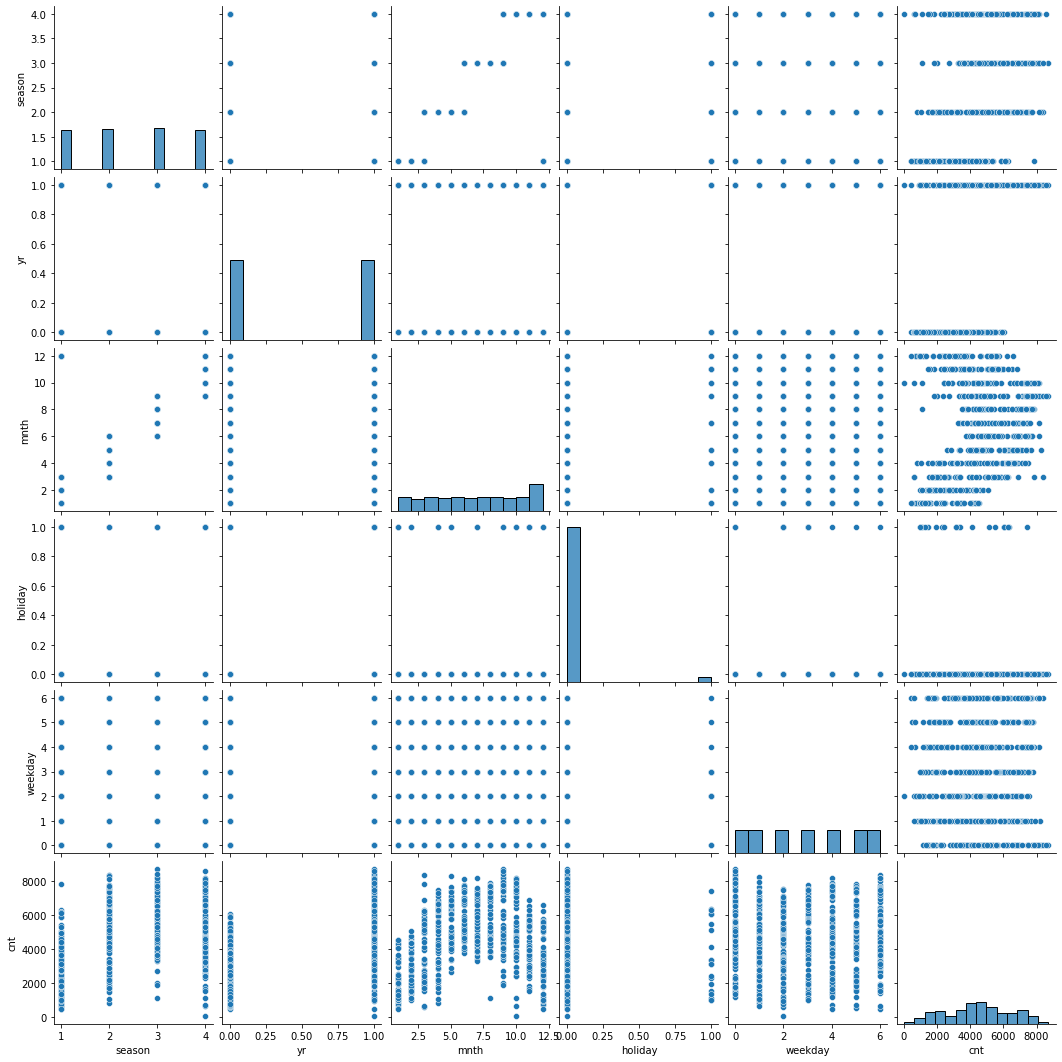

In [101]:
# Let's draw the Pairplot among Variables
sns.pairplot(bike[['season', 'yr', 'mnth', 'holiday', 'weekday','cnt']])
plt.show()

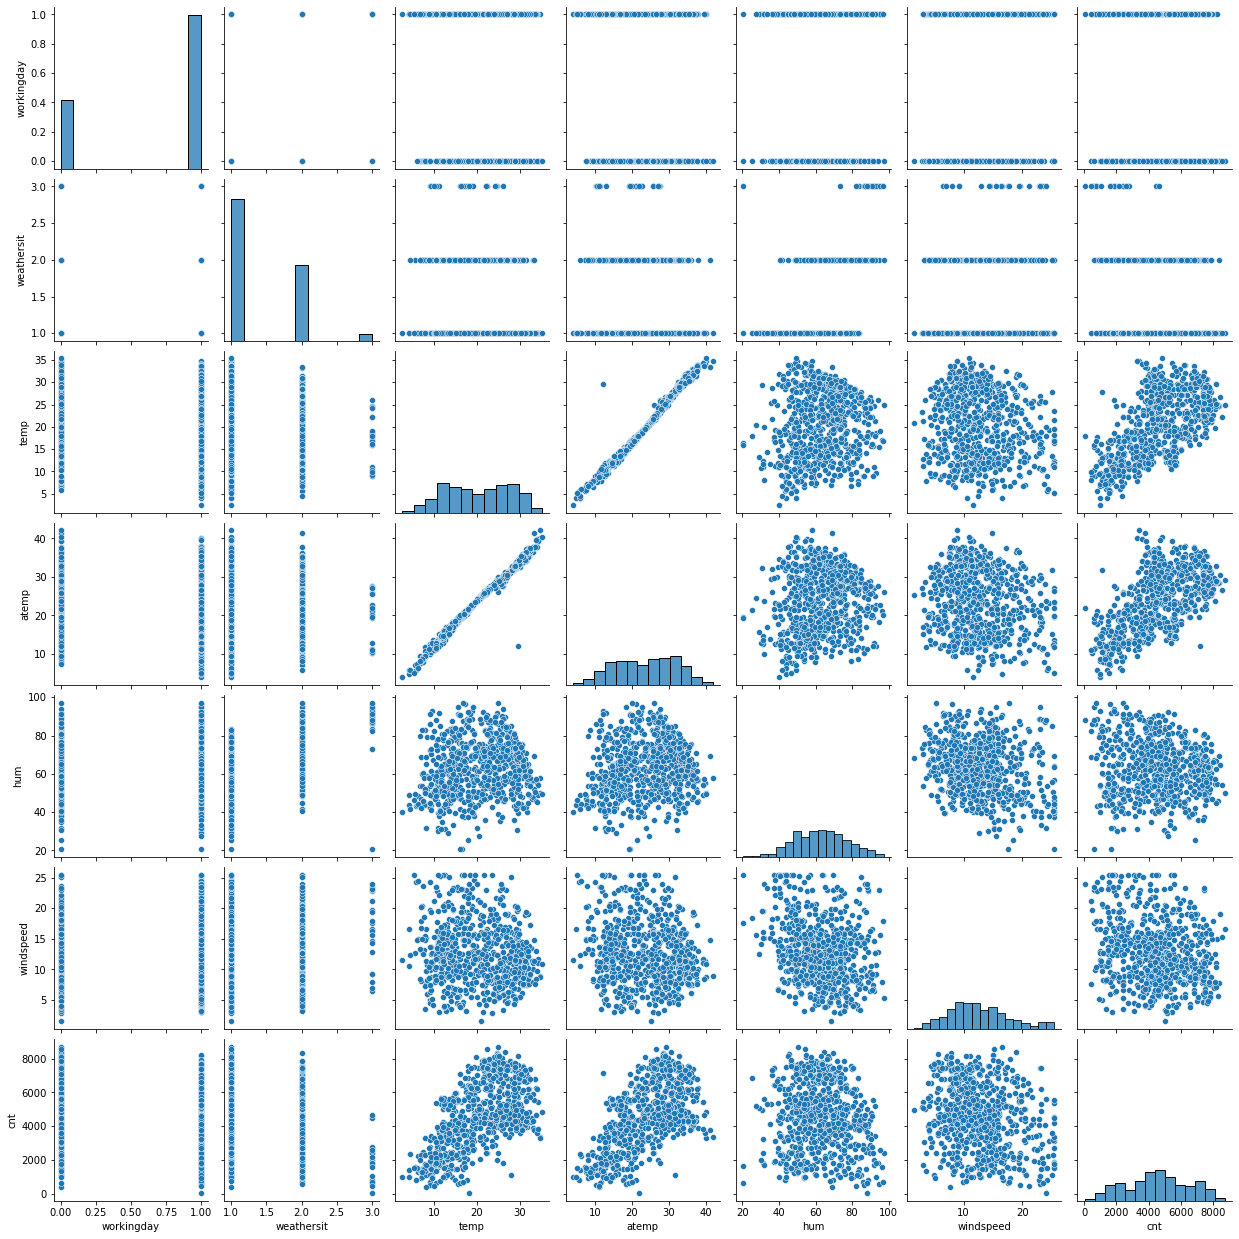

In [102]:
# Let's draw the Pairplot among Variables
sns.pairplot(bike[['workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

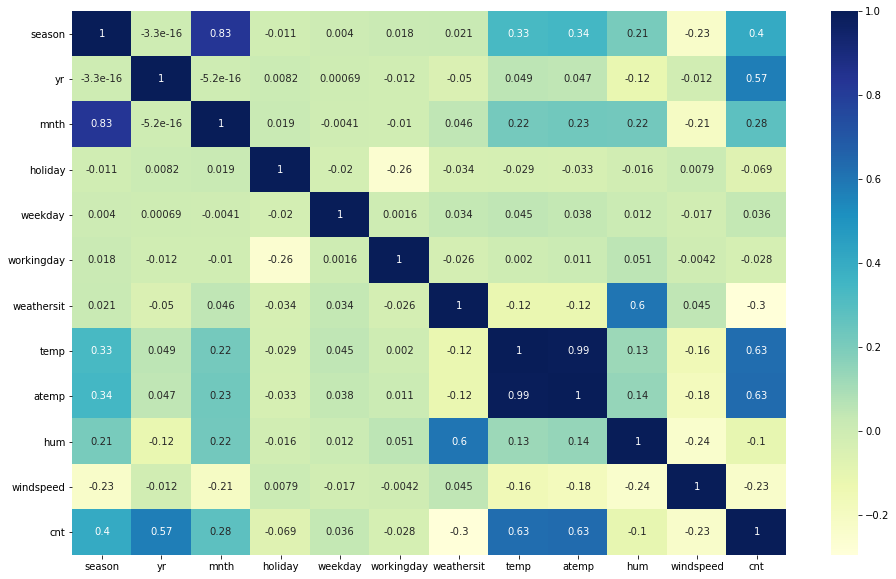

In [103]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [104]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.795640,12.720661,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.126173,5.071566,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,20.515637,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,25.501497,8714.000000


In [105]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [106]:
bike.season = bike.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [107]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [108]:
bike.yr = bike.yr.map({0:"2018", 1:"2019"})

In [109]:
bike.yr

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: yr, Length: 730, dtype: object

In [110]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [111]:
bike.mnth = bike.mnth.map({1:"Jan", 2:"feb", 3:"Mar", 4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [112]:
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [113]:
bike.holiday = bike.holiday.map({0:"No", 1:"Yes"})

In [114]:
bike.holiday

0      No
1      No
2      No
3      No
4      No
       ..
725    No
726    No
727    No
728    No
729    No
Name: holiday, Length: 730, dtype: object

In [115]:
bike.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [116]:
bike.weekday = bike.weekday.map({0:"Sun", 1:"Mon", 2:"Tue",3:"Wed", 4:"Thu",5:"Fri",6:"Sat"})

In [117]:
bike.weekday

0      Mon
1      Tue
2      Wed
3      Thu
4      Fri
      ... 
725    Fri
726    Sat
727    Sun
728    Mon
729    Tue
Name: weekday, Length: 730, dtype: object

In [118]:
bike.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [119]:
bike.workingday = bike.workingday.map({0:"No", 1:"Yes"})

In [120]:
bike.workingday

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
725    Yes
726     No
727     No
728    Yes
729    Yes
Name: workingday, Length: 730, dtype: object

In [121]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [122]:
bike.weathersit = bike.weathersit.map({1:"Clear", 2:"Mist",3:"Light Snow", 4:"Heavy Rain"})

In [123]:
bike.weathersit

0       Mist
1       Mist
2      Clear
3      Clear
4      Clear
       ...  
725     Mist
726     Mist
727     Mist
728    Clear
729     Mist
Name: weathersit, Length: 730, dtype: object

In [124]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Mon,Yes,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Tue,Yes,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thu,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [125]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [126]:
#Let's get convert categorical variable into dummies 
dumm_var = bike.select_dtypes(include = ['object'])
cat_dummies = pd.get_dummies(dumm_var, drop_first = True)

In [127]:
#Conact the dummy variable
bike = pd.concat([bike, cat_dummies], axis = 1)

In [128]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist
0,spring,2018,Jan,No,Mon,Yes,Mist,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,1,0,1
1,spring,2018,Jan,No,Tue,Yes,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,1,0,1
2,spring,2018,Jan,No,Wed,Yes,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,spring,2018,Jan,No,Thu,Yes,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,0,0
4,spring,2018,Jan,No,Fri,Yes,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [129]:
#drop all the categorical variables from the df dataframe
drop_varible = dumm_var.columns
bike.drop(columns = list(drop_varible), inplace = True)

In [130]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   730 non-null    float64
 1   atemp                  730 non-null    float64
 2   hum                    730 non-null    float64
 3   windspeed              730 non-null    float64
 4   cnt                    730 non-null    int64  
 5   season_spring          730 non-null    uint8  
 6   season_summer          730 non-null    uint8  
 7   season_winter          730 non-null    uint8  
 8   yr_2019                730 non-null    uint8  
 9   mnth_Aug               730 non-null    uint8  
 10  mnth_Dec               730 non-null    uint8  
 11  mnth_Jan               730 non-null    uint8  
 12  mnth_Jul               730 non-null    uint8  
 13  mnth_Jun               730 non-null    uint8  
 14  mnth_Mar               730 non-null    uint8  
 15  mnth_M

# Splitting the Data into Training and Testing Sets

In [131]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()

In [134]:
bike_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist
653,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
576,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
426,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [135]:
tansfor_var = ["temp", "atemp", "hum", "windspeed", "cnt"]
bike_train[tansfor_var] = scaler.fit_transform(bike_train[tansfor_var])

In [136]:
bike_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist
653,0.509887,0.501133,0.461512,0.413569,0.864243,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
576,0.815169,0.766351,0.652079,0.363923,0.827658,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.438975,0.543728,0.351077,0.465255,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.363506,0.911723,0.204096,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.391735,0.371673,0.259139,0.482973,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [137]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Modelling

### Adding all the variables to the model then drop the column since there are only 11 Independent varibales

In [138]:
#Bulding Model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(lm, 13)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [139]:
column = X_train.columns[rfe.support_]
column

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'holiday_Yes',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [140]:
X_train_rfe = X_train[column]
X_train_rfe.head()

,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light Snow,weathersit_Mist
653,0.509887,0.461512,0.413569,0,1,1,0,0,0,0,0,0,0
576,0.815169,0.652079,0.363923,0,0,1,0,1,0,0,0,0,0
426,0.442393,0.543728,0.351077,1,0,1,0,0,0,0,0,0,1
728,0.245101,0.363506,0.911723,1,0,1,0,0,0,0,0,0,0
482,0.395666,0.371673,0.259139,0,0,1,0,0,0,0,0,0,1


In [141]:
#Build a mannual model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm).fit()

In [142]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          3.07e-188
Time:                        12:24:36   Log-Likelihood:                 506.92
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

### Check VIF

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,15.88
0,temp,12.57
2,windspeed,4.15
3,season_spring,2.63
4,season_winter,2.41
12,weathersit_Mist,2.38
5,yr_2019,2.07
6,mnth_Jan,1.64
8,mnth_Nov,1.59
7,mnth_Jul,1.40


In [144]:
# mnth_Nov p value is more than 7% 
X= X_train_rfe.drop("mnth_Nov",axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   510 non-null    float64
 1   hum                    510 non-null    float64
 2   windspeed              510 non-null    float64
 3   season_spring          510 non-null    uint8  
 4   season_winter          510 non-null    uint8  
 5   yr_2019                510 non-null    uint8  
 6   mnth_Jan               510 non-null    uint8  
 7   mnth_Jul               510 non-null    uint8  
 8   mnth_Sep               510 non-null    uint8  
 9   holiday_Yes            510 non-null    uint8  
 10  weathersit_Light Snow  510 non-null    uint8  
 11  weathersit_Mist        510 non-null    uint8  
dtypes: float64(3), uint8(9)
memory usage: 20.4 KB


In [145]:
#Second Model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train,X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          9.79e-189
Time:                        12:24:36   Log-Likelihood:                 505.30
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     497   BIC:                            -929.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [146]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,15.88
0,temp,12.54
2,windspeed,4.11
3,season_spring,2.62
11,weathersit_Mist,2.38
5,yr_2019,2.07
4,season_winter,1.90
6,mnth_Jan,1.64
7,mnth_Jul,1.40
10,weathersit_Light Snow,1.28


In [147]:
# Removing hum since vif more than 10 
X= X.drop("hum",axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   510 non-null    float64
 1   windspeed              510 non-null    float64
 2   season_spring          510 non-null    uint8  
 3   season_winter          510 non-null    uint8  
 4   yr_2019                510 non-null    uint8  
 5   mnth_Jan               510 non-null    uint8  
 6   mnth_Jul               510 non-null    uint8  
 7   mnth_Sep               510 non-null    uint8  
 8   holiday_Yes            510 non-null    uint8  
 9   weathersit_Light Snow  510 non-null    uint8  
 10  weathersit_Mist        510 non-null    uint8  
dtypes: float64(2), uint8(9)
memory usage: 16.4 KB


In [148]:
#Third Model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train,X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          1.74e-186
Time:                        12:24:36   Log-Likelihood:                 497.14
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     498   BIC:                            -919.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [149]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.69
1,windspeed,4.10
2,season_spring,2.24
4,yr_2019,2.06
5,mnth_Jan,1.60
10,weathersit_Mist,1.53
3,season_winter,1.40
6,mnth_Jul,1.36
7,mnth_Sep,1.20
9,weathersit_Light Snow,1.08



# * Now we get the model with R square and VIF in Range 



- Lr3_R square : 0.834 and Coefficent P Value are under 5%
- So, lr3 is our final Model
- Let's Run Residual Analysis and Making Predictions Using the Final Model

# -------------------------------------------------------------------------------------------------------------

##  Residual Analysis of the train data

In [150]:
y_train_pred = lr_3.predict(X_train_lm)
y_train_pred

653    0.719819
576    0.745388
426    0.472200
728    0.405349
482    0.564650
         ...   
526    0.724960
578    0.847274
53     0.235228
350    0.272205
79     0.307385
Length: 510, dtype: float64

In [151]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

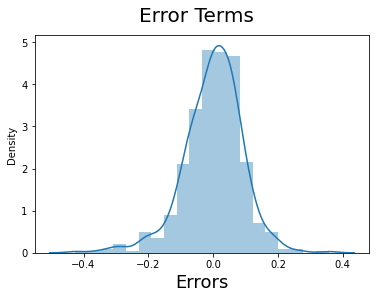

In [152]:
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

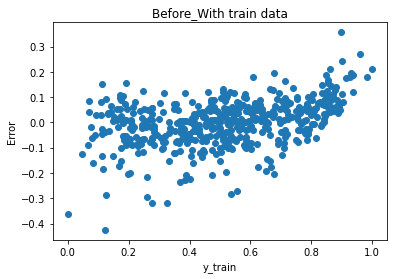

In [169]:
#Heteroskedasticity.

plt.scatter(y_train,res)
plt.title("Before_With train data")
plt.xlabel("y_train")
plt.ylabel("Error")
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [153]:
bike_test

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,10.899153,13.22605,68.7917,11.791732,2947,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
702,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
127,21.661653,25.94665,63.1667,5.000712,4333,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
640,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1


In [154]:
tansfor_var = ["temp", "atemp", "hum", "windspeed", "cnt"]
bike_test[tansfor_var] = scaler.transform(bike_test[tansfor_var])
bike_test

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist
184,0.831783,0.769660,0.565508,0.115794,0.692706,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
535,0.901354,0.842587,0.505614,0.211364,0.712034,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,0.511964,0.496145,0.794188,0.459509,0.303382,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0.881625,0.795343,0.286191,0.466884,0.547400,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0.817246,0.741471,0.130470,0.738905,0.569029,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.257562,0.243430,0.630845,0.395169,0.336516,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
702,0.519232,0.511907,0.690737,0.389651,0.757478,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
127,0.584649,0.577380,0.557340,0.095572,0.495973,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
640,0.745598,0.682653,0.769141,0.071654,0.868615,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1


In [155]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [156]:
#Adding constant to predictors
X_test_m1 = sm.add_constant(X_test)
#Dropping the same variables which we have Dropeed in training model 
X_test_m1 = X_test_m1.drop(["mnth_Nov","hum"],axis =1)


In [157]:
X_test_rfe = X_test[X_train_lm.columns[1:]]
X_test_rfe

,temp,windspeed,season_spring,season_winter,yr_2019,mnth_Jan,mnth_Jul,mnth_Sep,holiday_Yes,weathersit_Light Snow,weathersit_Mist
184,0.831783,0.115794,0,0,0,0,1,0,1,0,1
535,0.901354,0.211364,0,0,1,0,0,0,0,0,0
299,0.511964,0.459509,0,1,0,0,0,0,0,0,1
221,0.881625,0.466884,0,0,0,0,0,0,0,0,0
152,0.817246,0.738905,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
400,0.257562,0.395169,1,0,1,0,0,0,0,0,1
702,0.519232,0.389651,0,1,1,0,0,0,0,0,0
127,0.584649,0.095572,0,0,0,0,0,0,0,0,0
640,0.745598,0.071654,0,1,1,0,0,0,0,0,1


In [158]:
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.columns

Index(['const', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'holiday_Yes',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [159]:
# Making predictions using the third model

y_pred_m1 = lr_3.predict(X_test_rfe)

# Model Evaluation


In [160]:
from sklearn.metrics import r2_score
r2_score(y_true= y_test,y_pred =y_pred_m1)

0.8038819569631771

Text(0, 0.5, 'y_pred')

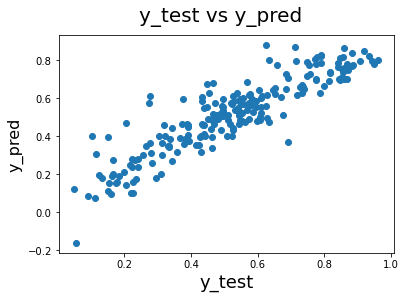

In [162]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

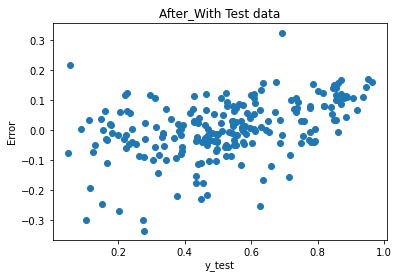

In [170]:
#Heteroskedasticity.

plt.scatter(y_test,y_test - y_pred_m1)
plt.title("After_With Test data")
plt.xlabel("y_test")
plt.ylabel("Error")
plt.show()


We can see that the equation of our best fitted line is:

$cnt = 0.2670 + 0.4325 \times temp  - 0.1095 \times windspeed - 0.1026 \times season_spring  + 0.0428 \times season_winter  + 0.2348 \times yr_ 2019  - 0.0421 \times mnth_Jan   - 0.0691 \times mnth_Jul  + 0.0586 \times mnth_Sep - 0.0972 \times holiday_Yes  - 0.2871 \times weathersit_Light Snow  - 0.0799 \times weathersit_Mist  $
